# Regressin Review

## 母集団モデルの前提

- 関心のある母集団（population of intereset）から無作為標本を得ている
- 変数は$x$と$y$の二つ
- $x$の変化による$y$の変動を知りたい（not causal language）

## 母集団モデルの構築

母集団では以下のモデルが成立していると仮定する
$$ y = \beta_0 + \beta_1 x + u $$

- 誤差項（error term）と呼ばれる変数を含んでいるので、このモデルは$x$以外の要素が$y$に影響を与えることを許容している
- $y$が$x$に線形依存しているという仮定によって、関数形を明示的にモデル化している
- $\beta_0$と$\beta_1$は母集団を記述していて、これらのパラメーターのデータはないので、直接観察することはできない 
    - 私たちにできることは、**データ**と**仮定**を用いて、これらのパラメーターを推定すること
    - データを用いてパラメーターを正確に推定するために、信頼できる(credible)仮定を置く必要がある

## 誤差項の仮定：標準化

$$ E(u) = 0 $$

- これは標準化の仮定であり、重要なものではない
- 仮に$E(u) = \alpha_0$としても、切片$\beta_0$を調整すればよい。これは$\beta_1$に影響を与えない。$\to$ y = (\beta_0 + \alpha_0) + \beta_1 x + (u - \alpha_0)$

## 誤差項の仮定：平均独立（mean independence）

$$ E(u|x) = E(u) \:\:\text{for all values}\:\: x $$

- $y$を賃金、$x$を学歴、$u$を観察できない能力とする
- 平均独立の仮定は、異なる教育レベルの母集団で平均的な能力は同じことを課す $\to$ 能力に応じて教育投資を決めているならば、この仮定は成立していない

## Zero conditional mean assumption

$$ E(u|x) = 0 \:\:\text{for all values}\:\: x $$ 

- 回帰分析モデルにおける重要な識別仮定（identification assumption）
- この仮定のもとで、$E(y|x) = \beta_0 + \beta_1 x$を得る。
    - 母集団回帰モデル（**population regression function**）は$x$について線形である
    - Angrist and Pischke (2009, MHE)では、条件つき期待値関数（**condition expectation function**）
    - この関係は$\beta_1$を因果パラメーター（**causal parameter**）として解釈するために重要なものである

## 最小二乗法（Ordinary least squares）の準備

パラメータ$\beta_0$と$\beta_1$を推定するために、$u$に関する仮定を用いる。

- 標準化仮定：$E(u) = 0$
- zero conditional mean assumption：$E(u|x) = 0$ $\to$ $E(xu) = E(xE(u|x)) = 0$

これらの仮定に母集団モデルを挿入すると、
$$ E(y - \beta_0 - \beta_1 x) = 0$$
$$ E(x [y - \beta_0 - \beta_1 x]) = 0$$

- これらは$\beta_0$と$\beta_1$を決める**母集団における**仮定である。

## 最小二乗法の準備

母集団からのランダムサンプルを$\{(x_i, y_i): i = 1, \ldots, n\}$とする。
私たちは母集団に関する情報にアクセスできないが、その標本対応（sample counterparts・sample analog）を知ることができる。

$$ \frac{1}{n} \sum_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$$
$$ \frac{1}{n} \sum_i x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$$

- $\hat{\beta}_0$と$\hat{\beta}_1$は推定値（**estimates**）である

## 最小二乗法の推定量の導出

第一式より、
$$ \bar{y} - \hat{\beta}_0 - \bar{x}\hat{\beta}_1 \to \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$
これを第二式に代入すると、
$$
\begin{align*}
    \sum_i x_i[y_i - (\bar{y} - \hat{\beta}_1 \bar{x}) - \hat{\beta}_1 x_i] &= 0  \\
    \sum_i x_i(y_i - \bar{y}) &= \hat{\beta}_1 \sum_i x_i(x_i - \bar{x}) \\
    \sum_i (x_i - \bar{x})(y_i - \bar{y}) &= \hat{\beta}_1 \sum_i (x_i - \bar{x})^2
\end{align*}
$$

## 最小二乗法の推定量

$\hat{\beta}_1$の推定量（**estimator**）は

$$
    \hat{\beta}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} = \frac{\text{Sample covariance}(x, y)}{\text{Sample variance}(x)}
$$

- この推定量は一般に**OLS推定量（OLS estimator）**と呼ばれる
- $x_i$の標本分散が0でないとき、この推定値を得られる
    - $x_i$の変動が$y_i$にへの影響を識別するもの
    - 研究者が関心のある説明変数（causal variable）について同じ値を持っているサンプルを観察しているならば、$y$と$x$の関係における傾き具合を決められない
- $\hat{\beta}_0$のOLS推定量は$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$
    - $\hat{\beta}_1$の推定値を得られたら、$\hat{\beta}_0$の推定値も得られる


## 予測値と残差

あるobservation $i$の予測値（fitted value）は
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x$$

あるobservation $i$の残差（residual）は
$$ \hat{u}_i = y_i - \hat{y}_i = y_i - \hat{\beta}_0 - \hat{\beta}_1 x$$

- 誤差項と残差の違い
    - 残差は予測誤差なので、データを用いて計算することができる $\to$ 回帰分析によってデータセットの中に現れる
    - 誤差項は定義（モデルによって捉えられない要素）より観察できない $\to$ データセットに現れることはない


## 予測誤差のサイズ

予測誤差のサイズは残差の二乗和（**the sum of squared residuals**）で計測できる
$$ \sum_i \hat{u}^2 = \sum_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x)^2$$

- この予測誤差のサイズを最小化するような$\hat{\beta}_0$と$\hat{\beta}_1$の推定量は先のものと一致する

## PythonでOLS推定したい：DGP

$$
\begin{align*}
    y_i = 5.5 x_i + 12 u_i \\
    x \sim N(0, 1)  \\
    u \sim N(0, 1)
\end{align*}
$$

In [1]:
# モジュールの導入 
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import plotnine as p

# モジュールにあるメソッドを導入
from itertools import combinations
from see import see  # 属性を調べるパッケージ

In [2]:
np.random.seed(1)

tb = pd.DataFrame({
    "x": np.random.normal(size = 10000),
    "u": np.random.normal(size = 10000)
})
tb["y"] = 5.5 * tb["x"].values + 12 * tb["u"].values

## pandas.DataFrame (1)

- Seriesと呼ばれるpandasの基本構造の一元配置をラベリングしたうえで、辞書型で集めたものがDataFrame(二次元配置)
- SeriesはNumpyのndarrayの一元配置
    - インデックスに番号以外のラベルを付けられる、オブジェクトそのものに名前をつけられる、時間データを格納できるという点で異なる
    - Rの`c()`に近いもの

## pandas.DataFrame (2)

Rによるデータフレームの作成と直感的に似ている二つの方法

1. 2次元配列：2次元配列を作って、それを`pandas.DataFrame`に渡す

```
twod_array = [[0, 1, 2], [3, 4, 5]]
pd.DataFrame(twod_array)
```

## pandas.DataFrame (3)

Rによるデータフレームの作成と直感的に似ている二つの方法

2. 辞書表記：辞書型のオブジェクトを作成して、それを`pandas.DataFrame`に渡す。このとき、辞書のキーがカラムのラベルになり、その内容がカラムに入る

```
dic_arr = {"a": [1, 2, 3], "b": [4, 5, 6]}
pd.DataFrame(dic_arr)

state = pd.Series(["Tokyo", "Osaka", "Aichi"])
population = pd.Series([13515, 8839, 2844])
pd.DataFrame({"state": state, "pop": population})
```

## pandas.DataFrame (4)

**copy**という概念 

- 引数で`copy = False`としたとき、元のデータが変更されたら、新しいDataFrameオブジェクトにも反映される。`copy = True`は反映されない。
- コピー元の内容と関連付けるならば、`copy = False`。コピー元の内容と関連付けることをやめて、新しいオブジェクトとして認識させたいなら、`copy = True`を使う。

## pandas.DataFrame (5)

- 新しいカラムは`DataFrame["新しいカラム名"] = データ`で追加できる（Rと同じ）
- カラムの削除は`del DataFrame["カラム名"]`
- インデックスとカラムに対応する値が存在しない場合が発生するとき、DataFrameはNaNでその値を補完


## pandas.DataFrame (6)

値の参照はRと同じ方法だが、二種類のやり方がある

- `DataFrame.loc["行ラベル", "列ラベル"]`：指定しない場合は`:`を使う
- `DataFrame.iloc[行番号, 列番号]`：指定しない場合は`:`を使う

## pandas.DataFrame (7)

重要な属性（Attributes）
- 属性とは、各オブジェクト固有のデータ保持領域にある要素のこと（Rでは、`lm`オブジェクトに`residuals`などの様々な要素がリストとして保存されていて、`lm()$residuals`でアクセスできる）
- `DataFrame.colums` $\to$ カラム名の一覧を取得（Rでは`names(DataFrame)`）
- `DataFrame.values` $\to$ データ部分のみを返す
- `DataFrame.size` $\to$ データ部分のアイテム数を返す
- `.describe()` $\to$ 各カラムの記述統計量を計算するメソッド


In [3]:
reg_tb = smf.ols("y ~ x", data = tb).fit()
print(reg_tb.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:19:09   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.3

## statsmodels

Pythonの基本的な統計解析パッケージで、以下の三つに分かれている

- `statsmodels.api`：クロスセクション用のモデルとメソッドがある $\to$ `import statsmodels.api as sm`
- `statsmodels.tsa.api`：時系列データ用のモデルとメソッドがある $\to$ `import statsmodels.tsa.api as tsa`
- `statsmodels.formula.api`：解析モデルをformula(Rと同じ)で指定できる便利API $\to$ `import statsmodels.formula.api as smf`

## statsmodels.api

statsmodels.apiの関数は`sm.手法(endog, exog, ...)`

- OLSならば、`sm.OLS(Y, X1, X2, ...., hasconst = bool)`で解析できる。`hasconst`は切片を含めるかどうか（具体的には1で構成される配置を作成して、それをexogに入れるみたい）
- WLSならば、`sm.WLS()`
- probitやlogitはそれぞれ`sm.Probit()`と`sm.Logit()`
- formulaでモデルを指定するばらば、`sm.手法.from_formula(formula string, data)`でいける

## statsmodels.formula.api

- Rのformulaと同様の書き方でモデルを定義できる
- statsmodels.formula.apiの関数はstatsmodels.apiの手法をすべて小文字に変えたもの

## `.fit()`メソッド

- この関数はあくまで解析手法を定義するだけのものなので、実際に実行するためには`.fit()`というメソッドを付ける必要がある
- `.fit()`を入れたオブジェクトにはいくつかの重要なAttributeがある
    - `params` $\to$ 係数を返す
    - `resid` $\to$ 残差を返す
    - `nobs` $\to$ 観測数を返す
    - `sigma` $\to$ 分散共分散行列を返す
    - `wexog` $\to$ デザイン行列（$X$)を返す
    - `wendog` $\to$ 被説明変数を配置で返す
    - `.predict()` $\to$ 予測値を計算するメソッド
    - `.summary()` $\to$ 結果の概要を示すメソッド

In [4]:
# 係数を取り出したい
reg_tb_b0 = reg_tb.params["Intercept"]
reg_tb_b1 = reg_tb.params["x"]

# 予測値を計算したい
tb["yhat1"] = reg_tb.predict(tb)
tb["yhat2"] = reg_tb_b0 + reg_tb_b1 * tb["x"]

# 残差を計算したい
tb["uhat1"] = reg_tb.resid
tb["uhat2"] = tb["y"] - tb["yhat2"]

tb.describe()

,x,u,y,yhat1,yhat2,uhat1,uhat2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,0.009773,0.009435,0.166975,0.166975,0.166975,7.219114e-16,7.219114e-16
std,0.998836,1.001239,13.289365,5.682040,5.682040,1.201339e+01,1.201339e+01
min,-3.656440,-3.451403,-50.654682,-20.688875,-20.688875,-4.142425e+01,-4.142425e+01
25%,-0.662925,-0.672294,-8.827691,-3.659775,-3.659775,-8.199882e+00,-8.199882e+00
50%,0.008454,0.018803,0.242724,0.159473,0.159473,4.497835e-02,4.497835e-02
75%,0.671809,0.688683,9.232769,3.933075,3.933075,8.147307e+00,8.147307e+00
max,4.026849,4.168118,48.162716,23.018769,23.018769,5.000751e+01,5.000751e+01


In [5]:
my_theme = (
    p.theme_minimal() + 
    p.theme(    

        # setting: plot
        panel_grid_major_x = p.element_blank(),
        panel_grid_minor_x = p.element_blank(),
        panel_grid_minor_y = p.element_blank(),

        # setting: axis
        axis_line = p.element_line(size = 1, color = "black"),
        axis_text = p.element_text(color="black",size=13),    
        axis_title = p.element_text(size=13),
        axis_ticks = p.element_line(),
        axis_ticks_length = 6
    )
)

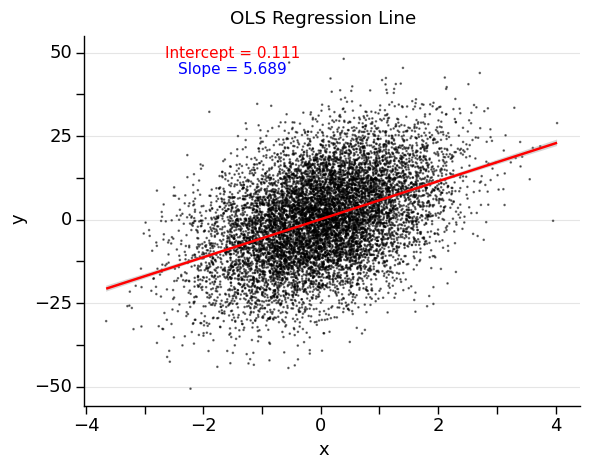

<ggplot: (-9223371958503765228)>

In [6]:
p.ggplot(tb, p.aes(x = "x", y = "y")) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(method = "lm", color = "red") +\
    p.annotate("text", x = -1.5, y = 50, color = "red", label = "Intercept = {:.3f}".format(reg_tb_b0)) +\
    p.annotate("text", x = -1.5, y = 45, color = "blue", label = "Slope = {:.3f}".format(reg_tb_b1)) +\
    my_theme

## plotnineという神モジュール

Rユーザーにとって神パッケージ。ggplot2の文法でグラフが描ける（`+`は`+\`で指定する）。あとはggplot2と同じ。すごい。

- annotateの中にあるlabelについて解説
    - `.format()`メソッドは文字列の書式設定を行える
    - `print("名前{name:8s}です。{old:4d}歳。".format(name="Tanaka", old=24))` $\to$ `名前Tanaka  です。  24歳。`
    - 書式指定についての詳細は[ここ](https://www.javadrive.jp/python/string/index24.html)を確認


## OLSの代数的性質：残差の和はゼロ

$$ \sum_i \hat{u}_i = 0$$

- 切片を含めたとき、$n^{-1} \sum_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$を仮定した。
- OLS推定量は残差の合計がゼロになる最適なものである
- 予測値の平均と観測値の平均は一致する（$n^{-1} \sum_i y_i = n^{-1} \sum_i \hat{y}_i + n^{-1} \sum_i \hat{u}_i$からわかる）

## OLSの代数的性質：残差と説明変数の共分散はゼロ

$$ \sum_i x_i \hat{u}_i = 0$$

- OLS推定量を導出するとき、$n^{-1} \sum_i x_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$を用いた。
- この結果より、残差と予測値の共分散（相関）は0であることを導ける $\to$ $\sum_i \hat{y}_i \hat{u}_i = 0$


## OLSの代数的性質：回帰直線は平均を通る

OLSの回帰直線は$(\bar{x}, \bar{y})$を通る
$$ \bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$$

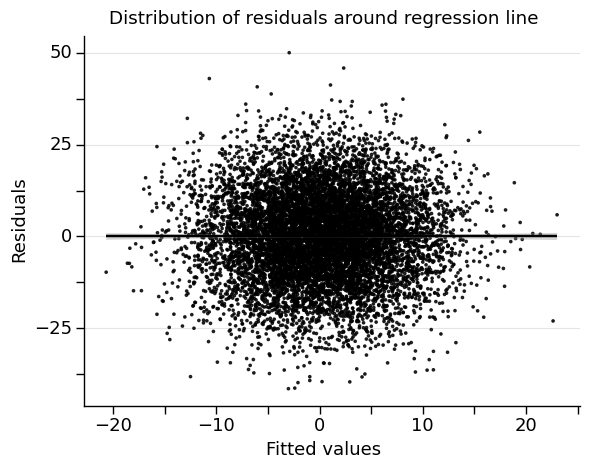

<ggplot: (-9223371958503668132)>

In [7]:
p.ggplot(tb, p.aes(x = "yhat1", y = "uhat1")) +\
    p.geom_point(size = 0.5, color = "black", alpha = 0.8) +\
    p.geom_smooth(method = "lm", color = "black") +\
    p.labs(title = "Distribution of residuals around regression line", x = "Fitted values", y = "Residuals") +\
    my_theme

In [8]:
tb["x_uhat"] = tb["x"].values * tb["uhat1"].values
tb["yhat_uhat"] = tb["yhat1"].values * tb["uhat1"].values

tb.sum()

x            9.772657e+01
u            9.435413e+01
y            1.669746e+03
yhat1        1.669746e+03
yhat2        1.669746e+03
uhat1        7.219114e-12
uhat2        7.219114e-12
x_uhat      -3.160494e-11
yhat_uhat   -1.800800e-10
dtype: float64

## 回帰分析を説明力に関する三つの指標

総平方和（**total sum of squares**・**SST**）、回帰平方和（**explained sum of squares**・**SSE**）、残差平方和（**residuals sum of squares**・**SSR**）を以下のように定義する
$$ \text{SST} = \sum_i (y_i - \bar{y})^2$$
$$ \text{SSE} = \sum_i (\hat{y}_i - \bar{y})^2$$
$$ \text{SSR} = \sum_i \hat{u}_i^2$$

- これらを$n - 1$（自由度は1）で割ると、$\text{SST}$は$y_i$の標本分散、$\text{SSE}$は$\hat{y}_i$の標本分散、$\text{SSR}$は$\hat{u}_i$の標本分散となる


## SST・SSE・SSRの関係

$$
\begin{align*}
    \text{SST} &= \sum_i (y_i - \bar{y})^2 \\
    &= \sum_i[(y_i - \hat{y}_i) + (\hat{y}_i - \bar{y})]^2  \\
    &= \sum_i[\hat{u}_i + (\hat{y}_i - \bar{y})]^2 \\
    &= \text{SSR} + \text{SSE} + 2\sum_i \hat{u}_i \hat{y}_i - 2 \bar{y} \sum_i \hat{u}_i \\
    &= \text{SSR} + \text{SSE} 
\end{align*}
$$

## Goodness-of-fit

$$ R^2 = \frac{\text{SSE}}{\text{SST}} = 1 - \frac{\text{SSR}}{\text{SST}}$$

- $x_i$で説明できる$y_i$の変動の割合（**R-squared**）
- この値が大きいほど、$y_i$はOLS回帰直線上に近づく
- この値は$y_i$と$\hat{y}_i$の相関の二乗と一致する
- 因果効果を推定することを目標とするならば、$R^2$の値に固執する必要はない（この値は因果関係について何も教えてくれない）

In [9]:
tb["ST"] = (tb["y"].values - tb["y"].mean())**2
tb["SE"] = (tb["yhat1"].values - tb["y"].mean())**2
tb["SR"] = (tb["uhat1"].values)**2

sst, sse, ssr = tb["ST"].sum(), tb["SE"].sum(), tb["SR"].sum()
r2_1, r2_2, r2_3 = sse/sst, 1 - ssr/sst, tb.corr().yhat1.y**2
r2_correct = reg_tb.rsquared

print("SSE/SST = {}".format(r2_1))
print("1 - SSR/SST = {}".format(r2_2))
print("squared corr(y, yhat1) = {}".format(r2_3))
print("OLS of statsmodels = {}".format(r2_correct))

SSE/SST = 0.18281009620183802
1 - SSR/SST = 0.18281009620183786
squared corr(y, yhat1) = 0.1828100962018387
OLS of statsmodels = 0.18281009620183786


## OLSの統計的性質：不偏性（unbiasedness）

$$E(\hat{\beta}) = \beta$$

- 異なるランダムサンプルを用いるとき、OLS推定量はどのような値を吐き出すか？ 
    - ランダムサンプルを繰り返したならば、我々は**平均的に**正しい推定値を得られるか？
- $\hat{\beta}$は特定のランダムサンプルによって得られる推定量の値
    - 異なるサンプルを用いれば、異なる推定値を得る
- 不偏性 $\to$ 母集団から多くのランダムサンプルを取り出し、推定量を計算したならば、推定値の平均は真値$\beta$と等しくなる


## 不偏性の証明の仮定

1. linear in parameters：母集団モデルは$y = \beta_0 + \beta_1 x + u$と仮定する
    - $x$と$u$はあるdata-genearting process (DGP)によって生成されたランダム変数の結果とみなせる
    - ならば、$y$も同様にランダム変数である
2. random sampling：母集団モデルにしたがって、サイズ$n$のランダムサンプル$\{(x_i, y_i):i = 1, \ldots, n\}$を持っている
    - 母集団から取り出したものなので、各$i$について$y_i = \beta_0 + \beta_1 x_i + u_i$と書ける
3. sample vairation in the explanatory variables：$x_i$のサンプルアウトカムは同じ値を取らない
    - そもそもこれを満たしていないと、OLS推定量は計算できない $\to$ 仮定とは言えない
4. zero conditional mean assumption：$E(u|x) = E(u) = 0$
    - 不偏性の証明で一番大事な仮定
    - 期待値がゼロという仮定は重要ではない。大切な部分は$E(u|x) = E(u)$


## 不偏性の証明(1)

$$
\begin{align*}
    \hat{\beta}_1 
    &= \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}  \\
    &= \frac{\sum_i (x_i - \bar{x}) y_i}{\sum_i (x_i - \bar{x})^2} \\
    &= \frac{\beta_0 \sum_i (x_i - \bar{x}) + \beta_1 \sum_i (x_i - \bar{x}) x_i + \sum_i (x_i - \bar{x}) u_i}{\sum_i (x_i - \bar{x})^2} \\
    &= \beta_1 + \frac{\sum_i (x_i - \bar{x}) u_i}{\sum_i (x_i - \bar{x})^2}
\end{align*}
$$

- $\hat{\beta}_1$は（a）母集団モデルの真値$\beta_1$と（b）$u_i$を$x_i$でOLS回帰したときに得られる傾きの和

## 不偏性の証明(2)

$w_i = (x_i - \bar{x})/\sum_i (x_i - \bar{x})^2$とする

$$
\begin{align*}
    \hat{\beta}_1 &= \beta_1 + \sum_i w_i u_i \\
    E(\hat{\beta}_1) &= \beta_1 + \sum_i E(w_i u_i) \\
    &= \beta_1 + \sum_i E[w_i E(u_i|x_1, \ldots, x_n)] \\
    &= \beta_1
\end{align*}
$$

## Pythonで不偏性のシミュレーションをしたい：DGP

$$
\begin{align*}
    y = 3 + 2x + u \\
    x \sim N(0, 9) \\
    u \sim N(0, 36)
\end{align*}
$$

In [10]:
coefs = np.zeros(1000)

np.random.seed(3)
for i in range(1000):
    N = 10000
    sd_x, sd_u = np.sqrt(9), np.sqrt(36)
    tb = pd.DataFrame({
        "x": np.random.normal(scale = sd_x, size = N), 
        "u": np.random.normal(scale = sd_u, size = N)
    })
    tb["y"] = 3 + 2 * tb["x"].values + tb["u"].values

    reg_tb = smf.ols("y ~ x", data = tb).fit()
    coefs[i] = reg_tb.params["x"]

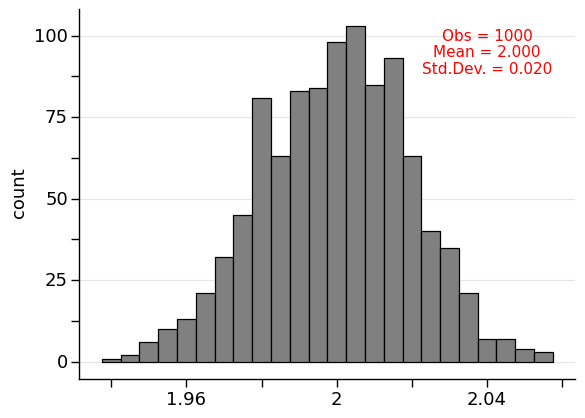

<ggplot: (-9223371958503516520)>

In [11]:
p.ggplot() +\
    p.geom_histogram(p.aes(x = coefs), binwidth = 0.005, fill = "grey", color = "black") +\
    p.annotate("text", x = 2.04, y = 100, color = "red", label = "Obs = {}".format(coefs.size)) +\
    p.annotate("text", x = 2.04, y = 95, color = "red", label = "Mean = {:.3f}".format(np.mean(coefs))) +\
    p.annotate("text", x = 2.04, y = 90, color = "red", label = "Std.Dev. = {:.3f}".format(np.std(coefs))) +\
    my_theme